In [1]:
%matplotlib inline
import numpy as np
from sklearn.datasets import make_blobs, load_iris
from matplotlib import pyplot as plt
from scipy import misc
import random

## We will develop the k-means module

In [2]:
def kmeans(X,K,max_iter=1000):
    """
    Perform k-means on the dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of clusters
    max_iter : int
        Maximum number of iterations to perform
        
    Returns
    -------
    means : ndarray of shape (K,d)
        the K recovered cluster means given row-wise
    groups : dict (of length K) of lists
        each list gives the indices of points in the cluster
    """
    # initialize the means as randomly selected points in the data
    ### your code here
    n, d = X.shape
    means = X[np.random.choice(range(n), K, replace=False)]
    
    # initialize the groups. a disctionary is recommended. 
    ### your code here
    groups = {k:[] for k in range(K)}
    
    # iterate
    for i in range(max_iter):

        # assign each point to a group
        dif = np.zeros((n, K))
        for j in range(K):
            dif[:,j]=np.sum((means[j,:]-X)**2, axis=1)
        mini = np.argmin(dif, axis=1)
        for j in range(K):
            groups[j] = np.where(j==mini)
            
        # calculate new means
        ### your code here
        new_means = np.array([np.mean(X[c], axis=0) for c in groups.values()])
        
        # see if we have converged
        if np.allclose(means,new_means):
            print("Converged after {} iterations!".format(i))
            return means, groups
        else:
            means = new_means
            groups = {i:[] for i in range(K)}
    print("Failed to converge after {} iterations...".format(max_iter))
    return means, groups

Converged after 4 iterations!


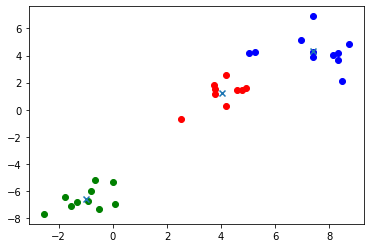

In [3]:
# toy example 
X,y = make_blobs(n_samples=30,n_features=2,centers=3)
means, groups = kmeans(X,3)
colorstring='rgb'
for k in range(3):
    plt.scatter(X[groups[k],0],X[groups[k],1],c=colorstring[k])
plt.scatter(means[:,0],means[:,1],marker="x")
plt.show()

In [4]:
# iris dataset example
iris = load_iris()
X = iris.data
Y = iris.target
means, groups = kmeans(X,3)
conf = np.empty((3,3))
for i in range(3):
    for j in range(3):
        conf[i,j] = (Y[groups[j]]==i).sum()
print("Confusion Matrix")
print(conf)

Converged after 6 iterations!
Confusion Matrix
[[ 0. 50.  0.]
 [47.  0.  3.]
 [14.  0. 36.]]


In [5]:
# save data for future use
iris_array = np.empty((X.shape[0],5))
iris_array[:,:-1] = X
iris_array[:,-1] = Y
np.savetxt("irisdata.txt",iris_array, fmt='%.1f')

## (b)

Original


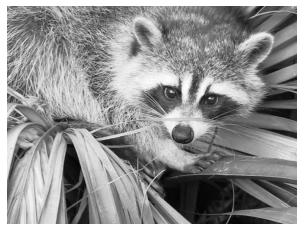

In [6]:
# compression example

# load image
f = misc.face(gray=True)
print("Original")
plt.imshow(f,cmap=plt.cm.Greys_r) 
plt.axis('off')
plt.show()

# quantize and plot

### your code here.


In [7]:
def plot(image, k, alg):
    img = image.reshape(-1,1).copy()
    means, groups = alg(img,k,max_iter=1000)
    for i in range(k):
        img[groups[i],0]=means[i]
    img = img.reshape(image.shape)
    plt.imshow(img, cmap=plt.cm.Greys_r)
    plt.axis('off')
    plt.show()


Converged after 3 iterations!


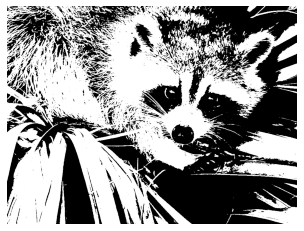

Converged after 9 iterations!


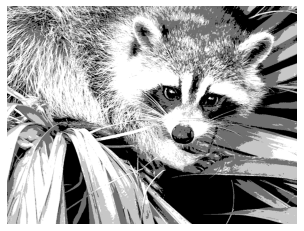

Converged after 14 iterations!


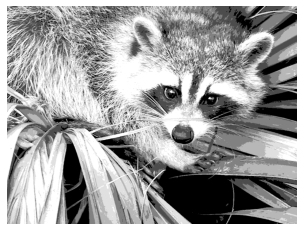

In [8]:
np.random.seed(4)
it = [2,4,6]

for i in it:
    plot(f, i, kmeans)

Converged after 21 iterations!


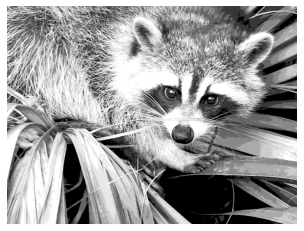

In [9]:
np.random.seed(1)
plot(f, 8, kmeans)

#### Take k=8, there will be no or little visual difference comparing to original picture.

### There is a similar algorithm of k-medians with small variation.

Algorithm:
1. Given K, randomly initialize the K cluster centers
2. Until converged:
    - Assign each point to the closest cluster center based on L1 norm
    - To minimize cost($cluster_1,...,cluster_k, c_1,...,c_k$) = $\sum_k\sum_{x_{ij} \in cluster_k}|x_{ij}-c_k|$, take derivative w.r.t. $c_{k'}$ for k'=1,...,k and set to 0, we have $\frac{d~cost}{d~c_{k'}}=\sum_{x_{ij} \in cluster_{k'}}sign(x_{ij}-c_{k'})=0$. In order to satisfy this, we need half of the points in this cluster to be larger than $c_{k'}$ and the other half to be smaller than it, and this will be the median. Therefore, take the median of each cluster to be the new cluster center.

In [10]:
def kmedians(X,K,max_iter=1000):
    """
    Perform k-means on the dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of clusters
    max_iter : int
        Maximum number of iterations to perform
        
    Returns
    -------
    medians : ndarray of shape (K,d)
        the K recovered cluster medians given row-wise
    groups : dict (of length K) of lists
        each list gives the indices of points in the cluster
    """
    # initialize the means as randomly selected points in the data
    ### your code here
    n, d = X.shape
    medians = X[np.random.choice(range(n), K, replace=False)]
    
    # initialize the groups. a disctionary is recommended. 
    ### your code here
    groups = {k:[] for k in range(K)}
    
    # iterate
    for i in range(max_iter):

        # assign each point to a group
        dif = np.zeros((n, K))
        for j in range(K):
            dif[:,j]=np.sum((medians[j,:]-X)**2, axis=1)
        mini = np.argmin(dif, axis=1)
        for j in range(K):
            groups[j] = np.where(j==mini)
            
        # calculate new medians
        ### your code here
        new_medians = np.array([np.median(X[c], axis=0) for c in groups.values()])
        
        # see if we have converged
        if np.allclose(medians,new_medians):
            print("Converged after {} iterations!".format(i))
            return medians, groups
        else:
            medians = new_medians
            groups = {i:[] for i in range(K)}
    print("Failed to converge after {} iterations...".format(max_iter))
            

Converged after 4 iterations!


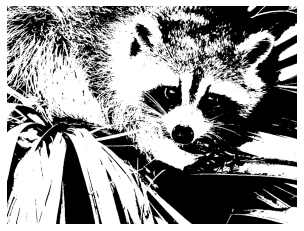

Converged after 10 iterations!


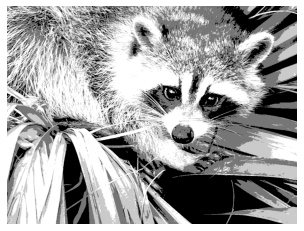

Converged after 14 iterations!


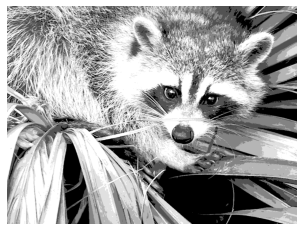

In [11]:
np.random.seed(4)
it = [2,4,6]

for i in it:
    plot(f, i, kmedians)

#### Two plots by kmeans and kmedians are not exactly the same (verified by their element-wise difference). Visually they are very similar in quality.